In [2]:
!pip install yfinance==0.2.4
!pip install pandas

In [10]:
import yfinance as yf
import pandas as pd

In [62]:
tesla_data= yf.Ticker('TSLA')


In [63]:
tesla_data=tesla.history(period="max")

In [64]:
tesla_data.reset_index(inplace=True)

In [65]:
tesla_data.to_csv('tesla_stock_data.csv', index=False)

In [66]:
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [22]:
!pip install bs4
import requests



In [56]:

from bs4 import BeautifulSoup
import pandas as pd

url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm"

data  = requests.get(url).text


soup = BeautifulSoup(data, 'html5lib')



table = soup.find("table")
rows = table.find_all("tr")

data = []
for row in rows[1:]:
    cells = row.find_all("td")
    date = cells[0].text.strip()
    revenue = cells[1].text.strip()
    data.append([date, revenue])

tesla_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])



In [49]:
print(tesla_revenue.tail(5))


    Date Revenue
8   2013  $2,013
9   2012    $413
10  2011    $204
11  2010    $117
12  2009    $112


In [52]:
gme_ticker = yf.Ticker("GME")

gme_data = gme_ticker.history(period="max")

#print(gme_data)

In [53]:
gme_data.reset_index(inplace=True)

In [54]:
tesla_data.to_csv('tesla_stock_data.csv', index=False)

In [55]:
tesla_data.head(5)

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2010-06-29 00:00:00-04:00,1.266667,1.666667,1.169333,1.592667,281494500,0.0,0.0
1,2010-06-30 00:00:00-04:00,1.719333,2.028000,1.553333,1.588667,257806500,0.0,0.0
2,2010-07-01 00:00:00-04:00,1.666667,1.728000,1.351333,1.464000,123282000,0.0,0.0
3,2010-07-02 00:00:00-04:00,1.533333,1.540000,1.247333,1.280000,77097000,0.0,0.0
4,2010-07-06 00:00:00-04:00,1.333333,1.333333,1.055333,1.074000,103003500,0.0,0.0


In [57]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html"

response = requests.get(url)
soup = BeautifulSoup(response.content, "html.parser")

In [59]:
table = soup.find("table", {"class": "historical_data_table"})
rows = table.find_all("tr")

data = []
for row in rows[1:]:
    cells = row.find_all("td")
    date = cells[0].text.strip()
    revenue = cells[1].text.strip().replace("$", "").replace(",", "")
    data.append([date, revenue])

gme_revenue = pd.DataFrame(data, columns=["Date", "Revenue"])


print(gme_revenue.tail(5))

    Date Revenue
11  2009    8806
12  2008    7094
13  2007    5319
14  2006    3092
15  2005    1843


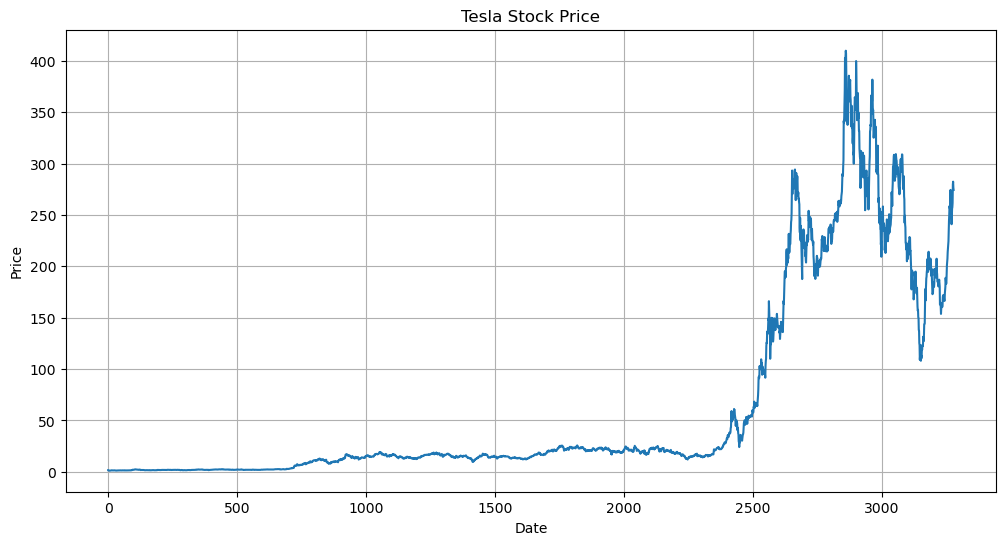

In [67]:

import matplotlib.pyplot as plt

# Create a ticker object for Tesla with the ticker symbol "TSLA"
#tesla_ticker = yf.Ticker("TSLA")

# Fetch the stock data
#tesla_data = tesla_ticker.history(period="1y")

# Define the make_graph function
def make_graph(data, title):
    plt.figure(figsize=(12, 6))
    plt.plot(data.index, data['Close'])
    plt.xlabel('Date')
    plt.ylabel('Price')
    plt.title(title)
    plt.grid(True)
    plt.show()

make_graph(tesla_data, "Tesla Stock Price")



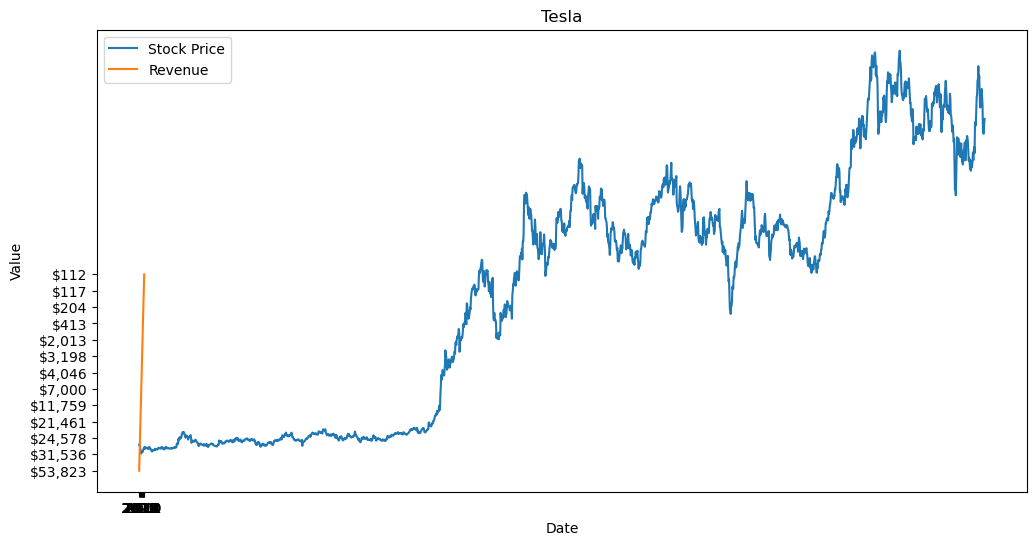

In [69]:


def make_graph(stock_data, revenue_data, title):
    # Plotting the stock data
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
    
    # Plotting the revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue')
    
    # Set the title and labels for the graph
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    
    # Set the legend and display the graph
    plt.legend()
    plt.show()

# Call the make_graph function with Tesla stock data and revenue data
make_graph(tesla_data.loc[:'2021-06-30'], tesla_revenue, 'Tesla')


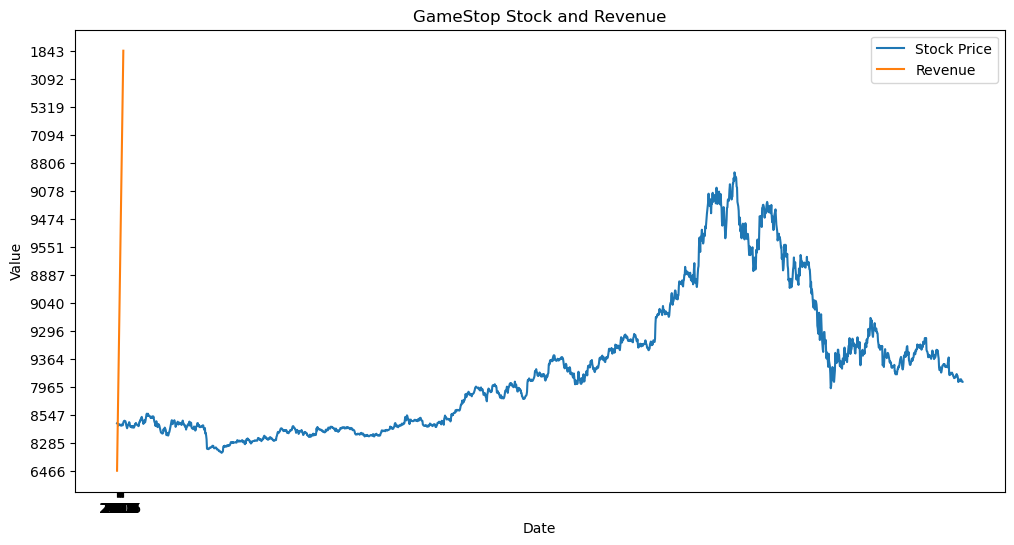

In [71]:


def make_graph(stock_data, revenue_data, title):
    # Plotting the stock data
    plt.figure(figsize=(12, 6))
    plt.plot(stock_data.index, stock_data['Close'], label='Stock Price')
    
    # Plotting the revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue')
    
    # Set the title and labels for the graph
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Value')
    
    # Set the legend and display the graph
    plt.legend()
    plt.show()

# Call the make_graph function with GameStop stock data and revenue data
make_graph(gme_data.loc[:'2021-06-30'], gme_revenue, 'GameStop Stock and Revenue')

